In [1]:
# import basic libraries for dataframe usage and viz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'SMS_Eligible_No_SMS_Presented_At_Appointment.ipynb',
 'sms_not_received_appointment_presented.csv']

In [3]:
# this function will greatly simplify getting percentages based on condition
# this can be used as a template if you want to change the equality operator to inequality (>,<, etc..)
def column_percentage_calculator(df, column_name, condition):
    total_rows = df.shape[0]
    num_matched_rows = len(df.loc[(df[column_name] == condition)])
    percentage_matches_condition = (num_matched_rows / total_rows) * 100
    return percentage_matches_condition

## It can be assumed that each row that is in data frame was eligible to receive a SMS reminder as the csv it is based on contains only rows from the original dataset that were eligible to recieve SMS reminders.

In [4]:
# import df with pandas and visually inspect the head 
sms_not_received_appointment_presented_df = pd.read_csv('sms_not_received_appointment_presented.csv')
sms_not_received_appointment_presented_df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num,Age Group,Interval Group
0,M,62,0,0,0,0,0,0,0,22,4,Older Adult and Seniors,2 - 30
1,F,60,0,0,0,0,0,0,0,10,4,Older Adult and Seniors,2 - 30
2,F,69,0,1,0,0,0,0,0,2,4,Older Adult and Seniors,2 - 30
3,M,2,0,0,0,0,0,0,0,10,4,Youth,2 - 30
4,M,1,0,0,0,0,0,0,0,10,4,Youth,2 - 30


In [5]:
sms_not_received_appointment_presented_df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num
count,16439.000000,16439.000000,16439.000000,16439.000000,16439.000000,16439.000000,16439.0,16439.0,16439.000000,16439.000000
mean,39.248008,0.082243,0.215767,0.072693,0.023602,0.018067,0.0,0.0,15.588053,1.751019
std,23.800168,0.274744,0.411366,0.259640,0.151812,0.133197,0.0,0.0,15.169514,1.513614
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,5.000000,0.000000
50%,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,11.000000,2.000000
75%,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,22.000000,3.000000
max,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,90.000000,5.000000


In [6]:
# examine df structure
sms_not_received_appointment_presented_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16439 entries, 0 to 16438
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          16439 non-null  object
 1   Age             16439 non-null  int64 
 2   Scholarship     16439 non-null  int64 
 3   Hipertension    16439 non-null  int64 
 4   Diabetes        16439 non-null  int64 
 5   Alcoholism      16439 non-null  int64 
 6   Handicap        16439 non-null  int64 
 7   SMS_received    16439 non-null  int64 
 8   No-show         16439 non-null  int64 
 9   Days_Between    16439 non-null  int64 
 10  Day_Num         16439 non-null  int64 
 11  Age Group       16439 non-null  object
 12  Interval Group  16439 non-null  object
dtypes: int64(10), object(3)
memory usage: 1.6+ MB


# AGE

<AxesSubplot:ylabel='Frequency'>

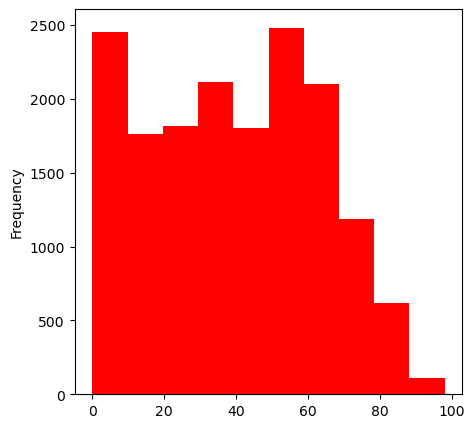

In [7]:
sms_not_received_appointment_presented_df.Age.plot(kind='hist', figsize=(5,5), color='red')

In [8]:
# calculate the median age for appointments that DID RECEIVE SMS REMINDER BUT NO SHOW
age_median = sms_not_received_appointment_presented_df.Age.median()
print('{} is the median age.'.format(age_median))

40.0 is the median age.


# DAYS_BETWEEN

<AxesSubplot:ylabel='Frequency'>

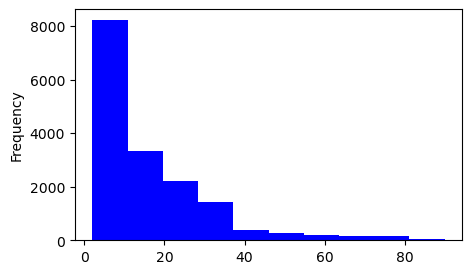

In [9]:
# visualize 'Days_Between' column distribution
sms_not_received_appointment_presented_df.Days_Between.plot(kind='hist', figsize=(5,3), color='blue')

# GENDER

In [10]:
# calculate percent each gender that DID RECEIVE SMS REMINDER BUT NO SHOW' rows with column_percentage_calculator already defined
not_receive_SMS_present_male_percent = column_percentage_calculator(sms_not_received_appointment_presented_df, 'Gender', 'M')
not_receive_SMS_present_female_percent = column_percentage_calculator(sms_not_received_appointment_presented_df, 'Gender', 'F')
print('{}% of SMS-eligible appointments that DID NOT RECEIVE SMS REMINDER AND PRESENTED were for male patients.'.format(round(not_receive_SMS_present_male_percent, 2)))
print('{}% of SMS-eligible appointments that DID NOT RECEIVE SMS REMINDER AND PRESENTED were for female patients.'.format(round(not_receive_SMS_present_female_percent, 2)))

34.63% of SMS-eligible appointments that DID NOT RECEIVE SMS REMINDER AND PRESENTED were for male patients.
65.37% of SMS-eligible appointments that DID NOT RECEIVE SMS REMINDER AND PRESENTED were for female patients.


Text(0.5, 1.0, 'No SMS Reminder But Presented Gender Percentage')

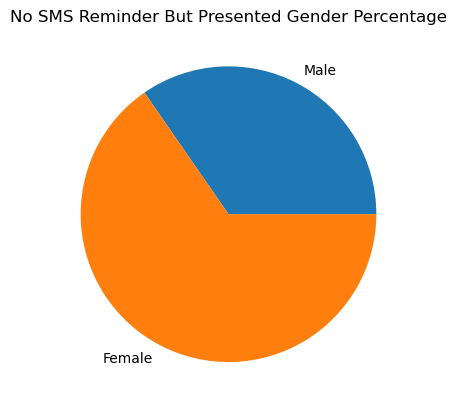

In [11]:
# visualize gender binary distribution
gender_percents = [not_receive_SMS_present_male_percent, not_receive_SMS_present_female_percent ]
labels = ['Male', 'Female']

fig, ax = plt.subplots()
ax.pie(gender_percents, labels = labels)
ax.set_title('No SMS Reminder But Presented Gender Percentage')

# INTERVAL GROUP

In [12]:
# obtain percentages of Interval Groups using the column_percentage_calculator function defined earlier 
two_to_thirty_percentage = column_percentage_calculator(sms_not_received_appointment_presented_df, 'Interval Group', '2 - 30')
num_thirtyone_to_sixty_percentage = column_percentage_calculator(sms_not_received_appointment_presented_df, 'Interval Group', '31 - 60')
num_sixtyone_to_ninety_percentage = column_percentage_calculator(sms_not_received_appointment_presented_df, 'Interval Group', '61 - 90')

print('Percentage of SMS-Eligible appointments that DID NOT RECEIVE SMS REMINDER BUT PRESENTED scheduled between 2 and 30 days out ---> {}%'.format(round(two_to_thirty_percentage,2)))
print('Percentage of SMS-Eligible appointments that DID NOT RECEIVE SMS REMINDER BUT PRESENTED scheduled between 31 and 60 days out ---> {}%'.format(round(num_thirtyone_to_sixty_percentage, 2)))
print('Percentage of SMS-Eligible appointments that DID NOT RECEIVE SMS REMINDER BUT PRESENTED scheduled between 61 and 90 days out ---> {}%'.format(round(num_sixtyone_to_ninety_percentage, 2)))

Percentage of SMS-Eligible appointments that DID NOT RECEIVE SMS REMINDER BUT PRESENTED scheduled between 2 and 30 days out ---> 86.43%
Percentage of SMS-Eligible appointments that DID NOT RECEIVE SMS REMINDER BUT PRESENTED scheduled between 31 and 60 days out ---> 10.96%
Percentage of SMS-Eligible appointments that DID NOT RECEIVE SMS REMINDER BUT PRESENTED scheduled between 61 and 90 days out ---> 2.61%


<AxesSubplot:>

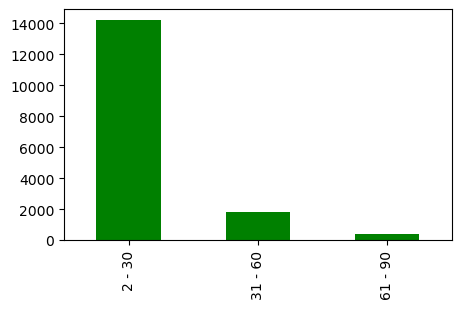

In [13]:
# visualize Interval Group categorical distribution in a bar plot
sms_not_received_appointment_presented_df['Interval Group'].value_counts().plot(kind='bar', figsize =(5,3), color='green')

# AGE BRACKETS

In [14]:
# calculate percentage for age group categorical column values
sms_eligible_youth_percentage = column_percentage_calculator(sms_not_received_appointment_presented_df, 'Age Group', 'Youth')
sms_eligible_young_adult_percentage = column_percentage_calculator(sms_not_received_appointment_presented_df, 'Age Group', 'Young Adult')
sms_eligible_adult_percentage = column_percentage_calculator(sms_not_received_appointment_presented_df, 'Age Group', 'Adult')
sms_eligible_older_adult_percentage = column_percentage_calculator(sms_not_received_appointment_presented_df, 'Age Group', 'Older Adult and Seniors')

print('Percentage of SMS-Eligible appointments that DID NOT RECEIVE SMS REMINDER BUT PRESENTED for Youths {}%'.format(round(sms_eligible_youth_percentage, 2)))
print('Percentage of SMS-Eligible appointments that DID NOT RECEIVE SMS REMINDER BUT PRESENTED for Young Adults {}%'.format(round(sms_eligible_young_adult_percentage, 2)))
print('Percentage of SMS-Eligible appointments that DID NOT RECEIVE SMS REMINDER BUT PRESENTED for Adults {}%'.format(round(sms_eligible_adult_percentage, 2)))
print('Percentage of SMS-Eligible appointments that DID NOT RECEIVE SMS REMINDER BUT PRESENTED for Older Adults and Seniors {}%'.format(round(sms_eligible_older_adult_percentage, 2)))

Percentage of SMS-Eligible appointments that DID NOT RECEIVE SMS REMINDER BUT PRESENTED for Youths 24.51%
Percentage of SMS-Eligible appointments that DID NOT RECEIVE SMS REMINDER BUT PRESENTED for Young Adults 21.05%
Percentage of SMS-Eligible appointments that DID NOT RECEIVE SMS REMINDER BUT PRESENTED for Adults 25.4%
Percentage of SMS-Eligible appointments that DID NOT RECEIVE SMS REMINDER BUT PRESENTED for Older Adults and Seniors 29.04%


# CONDITIONS

__As each 'condition' is it's own column and the values are only binary (0 for no, 1 for yes), the percentages for these variables WRT to all ROWS THAT DID NOT RECEIVE SMS REMINDER AND PRESENTED AT THE APPOINTMENT was obtained from the .describe() command and its output above. These values and respective labels will be used to visualize these variables on a bar graph.__

[Text(0, 0, 'Handicap'),
 Text(1, 0, 'Alcoholism'),
 Text(2, 0, 'Diabetes'),
 Text(3, 0, 'Scholarship Program'),
 Text(4, 0, 'Hypertension')]

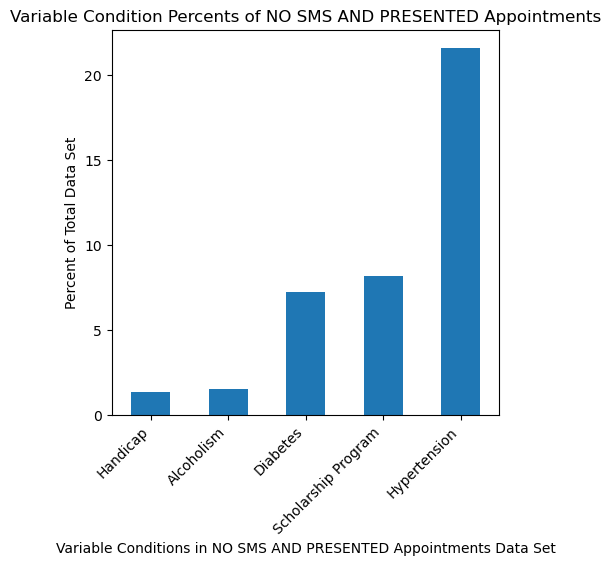

In [15]:
# create pandas series to graph and list of respective labels
condition_percents = pd.Series([1.33,  1.52, 7.27, 8.2, 21.58])
labels = ['Handicap', 'Alcoholism', 'Diabetes', 'Scholarship Program', 'Hypertension']


# plot graph of variable condition percentages
plt.figure(figsize=(5,5))
ax = condition_percents.plot(kind='bar')
ax.set_title('Variable Condition Percents of NO SMS AND PRESENTED Appointments')
ax.set_xlabel('Variable Conditions in NO SMS AND PRESENTED Appointments Data Set')
ax.set_ylabel('Percent of Total Data Set')
ax.set_xticklabels(labels, rotation=45, ha='right')

# These are descriptive statistics of ROWS THAT DID NOT RECEIVE SMS REMINDER AND PRESENTED AT APPOINTMENT. 

- __The average age for NO SMS-RECEIVED and PRESENTED appointments is 39 (39.25 rounded).__
- __The median age for NO SMS-RECEIVED and PRESENTED appointments is 40.__
- __The average time between the ScheduledDay and AppointmentDay for NO SMS-RECEIVED and PRESENTED appointments is 16 (15.59 rounded) days.__
- __Approximately 8.2% of NO SMS-RECEIVED and PRESENTED appointments are for patients enrolled in the 'scholarship' program (explained earlier in analysis).__
- __Approximately 21.58% of NO SMS-RECEIVED and PRESENTED are for patients suffering from hipertension (hypertension).__
- __Approximately 7.27% of NO SMS-RECEIVED and PRESENTED are for patients suffering from diabetes.__
- __Approximately 1.52% of NO SMS-RECEIVED and PRESENTED are for patients suffering from alcoholism.__
- __Approximately 1.33% of NO SMS-RECEIVED and PRESENTED are for patients identifying as handicapped.__
- __Approximately 34.63% of NO SMS-RECEIVED and PRESENTED rows were for appointments for male patients.__
- __Approximately 65.37% of NO SMS-RECEIVED and PRESENTED elibible rows were for appointments for female patients.__
- __Approximately 24.51% of NO SMS-RECEIVED and PRESENTED for Youths.__
- __Approximately 21.05% of NO SMS-RECEIVED and PRESENTED for Young Adults.__ 
- __Approximately 25.40% of NO SMS-RECEIVED and PRESENTED for Adults.__
- __Approximately 29.04% of NO SMS-RECEIVED and PRESENTED for Older Adults and Seniors.__ 
- __Approximately 86.43%% of NO SMS-RECEIVED and PRESENTED were scheduled between 2 and 30 days out.__
- __Approximately 10.96% of NO SMS-RECEIVED and PRESENTED scheduled between 31 and 60 days out.__
- __Approximately 2.61% of NO SMS-RECEIVED and PRESENTED scheduled between 61 and 90 days out.__

In [16]:
1 == 1

True

# This is the end of this section of EDA for ROWS THAT DID NOT RECEIVE SMS REMINDER AND PRESENTED AT THE APPOINTMENT